In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def funcao_ativacao(potencial_ativacao_u):
    return potencial_ativacao_u >= 0

In [46]:
def calcular_erro_medio(pesos_w, desejados_d, np_entradas, debug = False):
    qtd_entradas = len(np_entradas);
    if debug:
        print("entradas: " + str(qtd_entradas))
    erros = []
    for i in range(qtd_entradas):
        entrada = np_entradas[i]
        desejado = np_desejados[i]
        potencial_ativacao_u = np.dot(entrada, pesos_w)
        erro = desejado - potencial_ativacao_u
        if debug:
            print("erro: " + str(erro))
        erro_quadrado = np.square(erro)
        if debug:
            print("erro quadrado: " + str(erro_quadrado))
        erros.append(erro_quadrado)
    erro_medio = np.average(erros)
    if debug:
        print("erro médio: " + str(erro_medio))
    return erro_medio

In [41]:
def plotar_fronteira(pesos, entradas, desejados):
    plt.style.use('ggplot')

    b, w1, w2 = pesos
    print("pesos:")
    print(b, w1, w2)
    x = -b / w1
    y = -b / w2
    d = y
    c = -y / x

    line_x_coords = np.array([0, x])
    print("coordenadas x:")
    print(line_x_coords)
    line_y_coords = c * line_x_coords + d
    print("coordenadas y:")
    print(line_y_coords)

    plt.plot(line_x_coords, line_y_coords)
    plt.scatter(entradas[:, 0], entradas[:, 1], c=desejados, s=75)
    plt.show()

In [42]:
def adaline(iteracoes_maxima, erros, taxa_aprendizagem, entradas_x, pesos_w, desejados_d, precisao, plot = True, debug = False):
    ##Adiciona um coeficiente 1 para o bias na matriz de entradas
    np_entradas = np.c_[np.ones(entradas_x.shape[0]), entradas_x]
    if debug:
        print("entradas: " + str(np_entradas))
    epoca = 1
    erro_anterior = 0
    erro_medio = 0
    erroEsperado = False
    while (epoca < iteracoes_maxima and not erroEsperado):
        for i in range(len(np_entradas)):
            entrada = np_entradas[i]
            if debug:
                print("entrada: " + str(entrada))
            desejado = np_desejados[i]
            if debug:
                print("desejado: " + str(desejado))
            if debug:
                print("pesos: " + str(pesos_w))
            potencial_ativacao_u = np.dot(entrada, pesos_w)
            if debug:
                print("potencial de ativação u: " + str(potencial_ativacao_u))
            erro_e = desejado - potencial_ativacao_u
            if debug:
                print("erro: " + str(erro_e))
            mudanca_pesos = taxa_aprendizagem * np.dot(erro_e, entrada)
            if debug:
                print("mudança: " + str(mudanca_pesos))
            pesos_w += mudanca_pesos
            if debug:
                print("novos pesos: " + str(pesos_w))
        erro_anterior = erro_medio
        erro_medio = calcular_erro_medio(pesos_w, desejados_d, np_entradas, debug=debug)
        variacao_erro = abs(erro_medio - erro_anterior)
        if debug:
            print("variação do erro: " + str(variacao_erro))
        erroEsperado = variacao_erro <= precisao
        if plot:
            if ((epoca == 1 or epoca % 50 == 0) or (erroEsperado)):
            #if ((epoca < 50) or (erroEsperado)):                
                print("época " + str(epoca))
                plotar_fronteira(pesos_w, entradas_x, desejados_d)
        if (not erroEsperado):
            epoca += 1
            if debug:
                print("tem erros, avançando para época " + str(epoca))
    return pesos_w, epoca, erros

In [43]:
##Trata bias como um peso w0
pesos_w = np.array([-.8649, .3192, .3129])
np_desejados = np.array([0, 1, 1, 1])
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
pesos, epocas, erros = adaline(iteracoes_maxima=500, erros=[], taxa_aprendizagem=0.1, entradas_x=entradas, pesos_w=pesos_w, desejados_d=np_desejados, precisao = 0, plot = False, debug = True)
print("final:\npesos %s\n%s épocas" % (str(pesos), str(epocas)))

entradas: [[ 1.  0.  0.]
 [ 1.  0.  1.]
 [ 1.  1.  0.]
 [ 1.  1.  1.]]
entrada: [ 1.  0.  0.]
desejado: 0
pesos: [-0.8649  0.3192  0.3129]
potencial de ativação u: -0.8649
erro: 0.8649
mudança: [ 0.08649  0.       0.     ]
novos pesos: [-0.77841  0.3192   0.3129 ]
entrada: [ 1.  0.  1.]
desejado: 1
pesos: [-0.77841  0.3192   0.3129 ]
potencial de ativação u: -0.46551
erro: 1.46551
mudança: [ 0.146551  0.        0.146551]
novos pesos: [-0.631859  0.3192    0.459451]
entrada: [ 1.  1.  0.]
desejado: 1
pesos: [-0.631859  0.3192    0.459451]
potencial de ativação u: -0.312659
erro: 1.312659
mudança: [ 0.1312659  0.1312659  0.       ]
novos pesos: [-0.5005931  0.4504659  0.459451 ]
entrada: [ 1.  1.  1.]
desejado: 1
pesos: [-0.5005931  0.4504659  0.459451 ]
potencial de ativação u: 0.4093238
erro: 0.5906762
mudança: [ 0.05906762  0.05906762  0.05906762]
novos pesos: [-0.44152548  0.50953352  0.51851862]
entradas: 4
erro: 0.44152548
erro quadrado: 0.194944749489
erro: 0.92300686
erro quadrad

In [44]:
##Testa função de ativação com pesos finais
np_entradas = np.c_[ np.ones(entradas.shape[0]), entradas ]
funcao_ativacao(np.dot(np_entradas, pesos))

array([ True,  True,  True,  True], dtype=bool)

época 1
pesos:
0.252 0.152 0.162
coordenadas x:
[ 0.         -1.65789474]
coordenadas y:
[-1.55555556  0.        ]


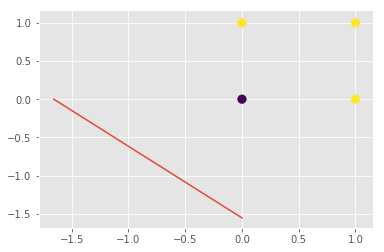

época 50
pesos:
0.285592305862 0.438815053303 0.466272975278
coordenadas x:
[ 0.         -0.65082614]
coordenadas y:
[-0.61250023  0.        ]


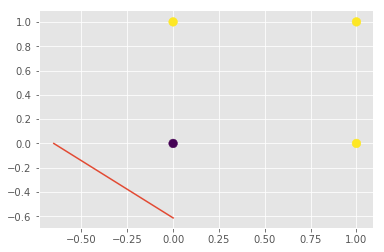

época 100
pesos:
0.278032389456 0.444261036939 0.47202837606
coordenadas x:
[ 0.         -0.62583114]
coordenadas y:
[-0.58901626  0.        ]


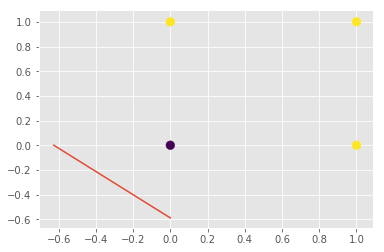

época 150
pesos:
0.277786073491 0.444438468725 0.472215906326
coordenadas x:
[ 0.         -0.62502707]
coordenadas y:
[-0.58826073  0.        ]


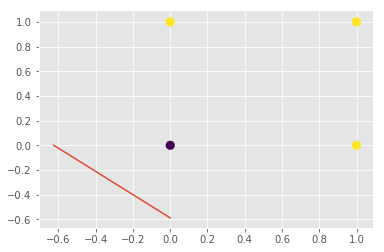

época 200
pesos:
0.277778048067 0.444444249745 0.472222016439
coordenadas x:
[ 0.         -0.62500088]
coordenadas y:
[-0.58823612  0.        ]


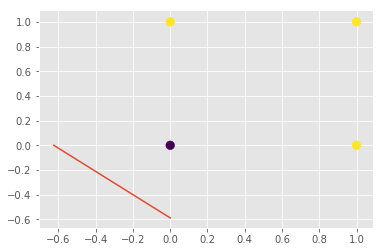

época 250
pesos:
0.277777786584 0.444444438101 0.472222215517
coordenadas x:
[ 0.         -0.62500003]
coordenadas y:
[-0.58823532  0.        ]


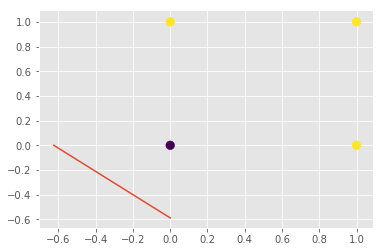

época 300
pesos:
0.277777778065 0.444444444238 0.472222222004
coordenadas x:
[ 0.    -0.625]
coordenadas y:
[-0.58823529  0.        ]


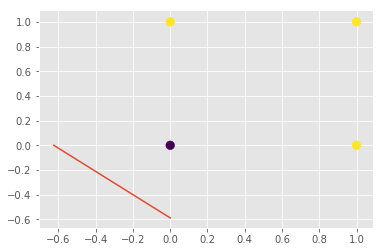

época 350
pesos:
0.277777777787 0.444444444438 0.472222222215
coordenadas x:
[ 0.    -0.625]
coordenadas y:
[-0.58823529  0.        ]


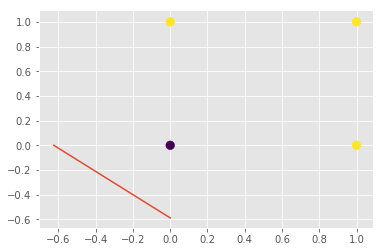

época 400
pesos:
0.277777777778 0.444444444444 0.472222222222
coordenadas x:
[ 0.    -0.625]
coordenadas y:
[-0.58823529  0.        ]


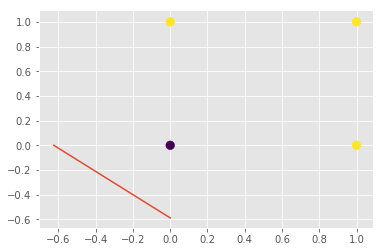

época 449
pesos:
0.277777777778 0.444444444444 0.472222222222
coordenadas x:
[ 0.    -0.625]
coordenadas y:
[-0.58823529  0.        ]


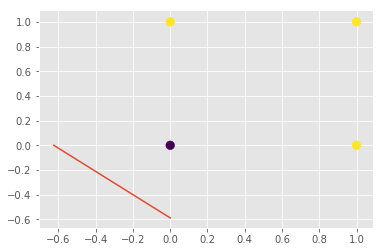

final:
pesos [ 0.27777778  0.44444444  0.47222222]
449 épocas


In [45]:
##Trata bias como um peso w0
pesos_w = np.zeros(3)
np_desejados = np.array([0, 1, 1, 1])
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
pesos, epocas, erros = adaline(iteracoes_maxima=500, erros=[], taxa_aprendizagem=0.1, entradas_x=entradas, pesos_w=pesos_w, desejados_d=np_desejados, precisao = 0, plot = True, debug = False)
print("final:\npesos %s\n%s épocas" % (str(pesos), str(epocas)))